<a href="https://colab.research.google.com/github/het8802/Bank-Data-Analysis/blob/main/Bank_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/het8802/Bank-Data-Analysis/main/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
cols = df.columns
unwanted_cols = [cols[0], cols[-1], cols[-2]]
df.drop(labels = unwanted_cols, axis = 1, inplace = True)

In [7]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
cat_to_num_cols = df.dtypes[df.dtypes == 'object'].index

In [10]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
for i in cat_to_num_cols :
    older_values = df[i].value_counts().index
    df[i] = df[i].replace(older_values, range(len(older_values)))
    df[i].value_counts()

In [12]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,0,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,0,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,0,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,2,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,3,0,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **Beginning analysis of the data**

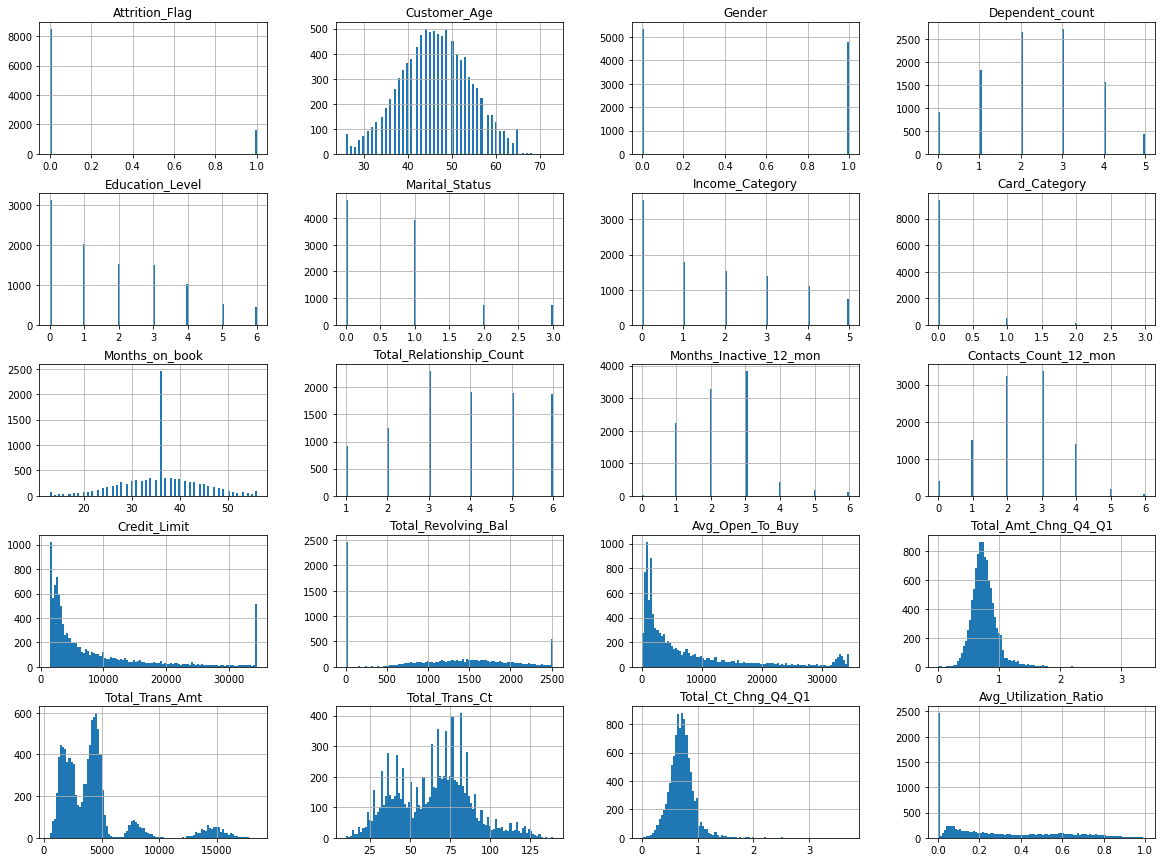

In [13]:
df.hist(figsize = (20,15), bins = 100)
plt.show()

# **Analysis of the whole data in a single frame**

If you are running this file in google colab, then and only then, unhash the next two code cells

In [14]:
# from google.colab import widgets 
# col_list = df.columns
# tb = widgets.TabBar(list(col_list))
# # j = 0
# for i, j in zip(col_list, range(len(col_list))) :
#     with tb.output_to(j) :
#         plt.figure(figsize = (20,10))
#         sns.histplot(data = df, x = i, bins = 50)
#         plt.show(i)

In [15]:
# tb = widgets.TabBar(list(col_list))

# for i, j in zip(col_list, range(len(col_list))) :
#     with tb.output_to(j) :
#         plt.figure(figsize = (30,20))
#         plt.plot(np.arange(1, len(df[i])+1), df[i], color = 'green')
#         plt.show()

In [16]:
corr_mat = df.corr()
corr_mat['Attrition_Flag']

Attrition_Flag              1.000000
Customer_Age                0.018203
Gender                     -0.037272
Dependent_count             0.018991
Education_Level             0.022266
Marital_Status              0.016605
Income_Category            -0.009004
Card_Category               0.002354
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
Name: Attrition_Flag, dtype: float64

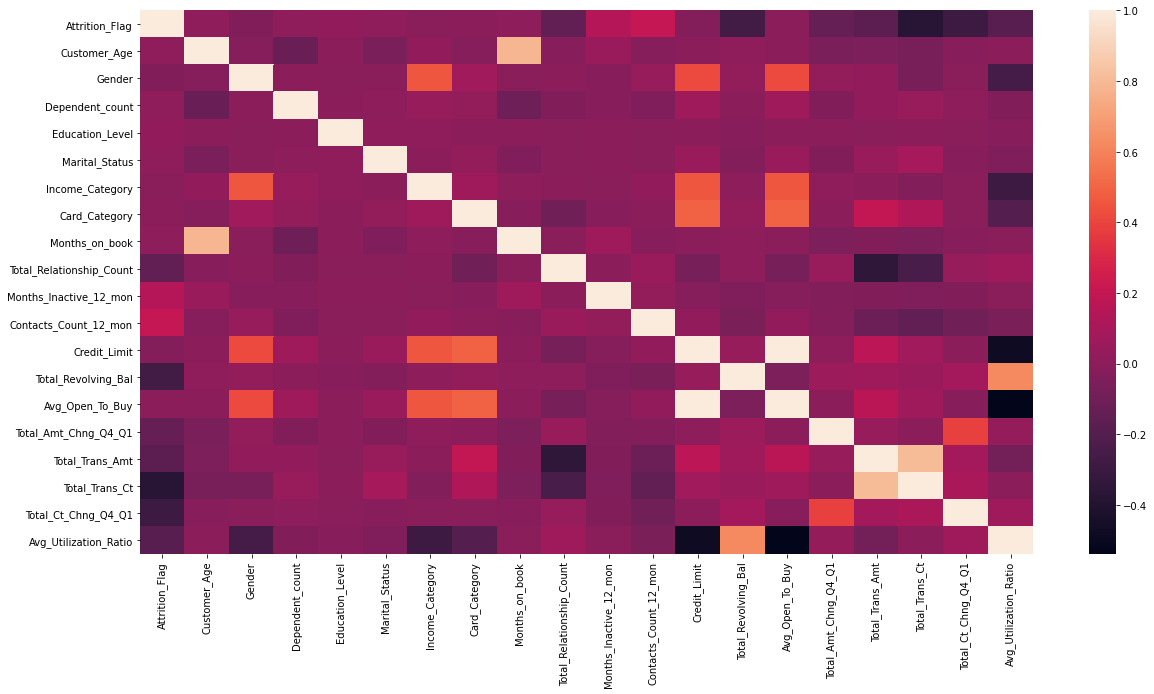

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat)
plt.show()

In [18]:
to_norm_cols = df.columns[12:]
to_norm_cols


Index(['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
sub_df = pd.DataFrame(std.fit_transform(df[to_norm_cols]), columns = to_norm_cols)

In [20]:
df[to_norm_cols] = sub_df

In [21]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,0.160660,46.325960,0.470919,2.346203,1.861361,0.758862,1.693394,0.083638,35.928409,3.812580,2.341167,2.455317,9.430893e-16,-1.830898e-15,-4.386159e-17,-2.522751e-16,-5.134192e-16,1.194179e-14,-1.100466e-16,-2.186132e-16
std,0.367235,8.016814,0.499178,1.298908,1.770156,0.879864,1.647213,0.333784,7.986416,1.554408,1.010622,1.106225,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01
25%,0.000000,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.000000,2.000000,2.000000,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01
50%,0.000000,46.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01
75%,0.000000,52.000000,1.000000,3.000000,3.000000,1.000000,3.000000,0.000000,40.000000,5.000000,3.000000,3.000000,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00


# **Testing different classifiers**

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Attrition_Flag'], test_size = 0.3, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestClassifier as rfc

model = rfc()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9559065482066469

In [24]:
from sklearn.neighbors import KNeighborsClassifier as knc

knc_model = knc()
knc_model.fit(x_train, y_train)
knc_model.score(x_test, y_test)

0.870352089503126

In [25]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_model.score(x_test, y_test)

0.8446857518920697

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_model.score(x_test, y_test)

0.8779203685422836

In [27]:
from sklearn.tree import DecisionTreeClassifier as dtc

dtc_model = dtc()
dtc_model.fit(x_train, y_train)
dtc_model.score(x_test, y_test)

0.9279368213228035

In [28]:
from sklearn.linear_model import SGDClassifier as sgd

sgd_model = sgd()
sgd_model.fit(x_train, y_train)
sgd_model.score(x_test, y_test)

0.8427114182296808

# **Getting the model for our data**

In [29]:
from joblib import dump, load

dump(model, 'Bank-Data-Analysis.joblib')

['Bank-Data-Analysis.joblib']

In [30]:
model = load('Bank-Data-Analysis.joblib')
final_predictions = model.predict(x_test)